In [1]:
import os
import pandas as pd
os.environ['KAGGLE_USERNAME'] = "vanshjulka"
os.environ['KAGGLE_KEY'] = "5d2531b5bc965aa31a2a84c0bd14e0cb"
!kaggle datasets download shree1992/housedata
!unzip housedata.zip

  0% 0.00/432k [00:00<?, ?B/s]
100% 432k/432k [00:00<00:00, 95.4MB/s]
Archive:  housedata.zip
  inflating: data.csv                
  inflating: data.dat                
  inflating: output.csv              


In [2]:
df = pd.read_csv('data.csv')
df


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [3]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-5-4c84db58efd5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap = 'coolwarm')


<Axes: >

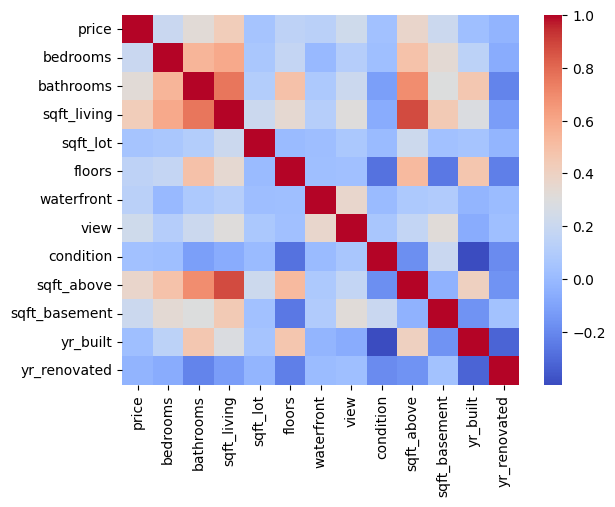

In [5]:
sns.heatmap(df.corr(),cmap = 'coolwarm')

<ipython-input-6-c445cd4853dd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'],kde=False,ax=ax)


Text(0, 0.5, 'Freq')

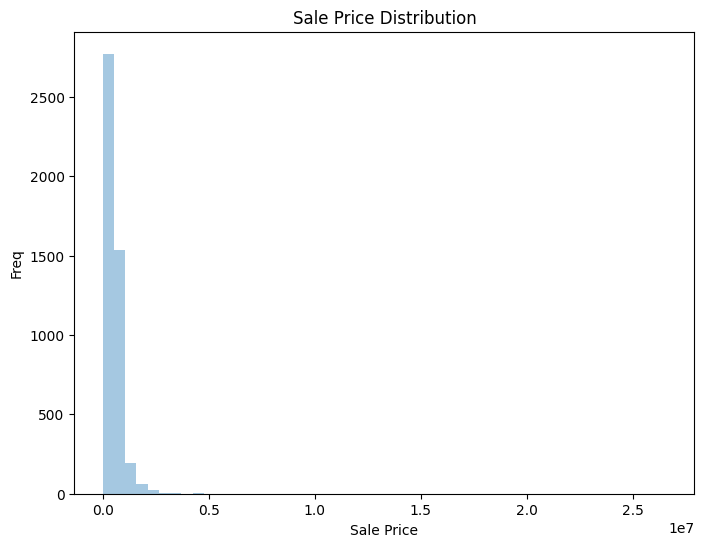

In [6]:
fig,ax = plt.subplots(figsize=(8,6))
sns.distplot(df['price'],kde=False,ax=ax)
plt.title('Sale Price Distribution')
plt.xlabel('Sale Price')
plt.ylabel('Freq')

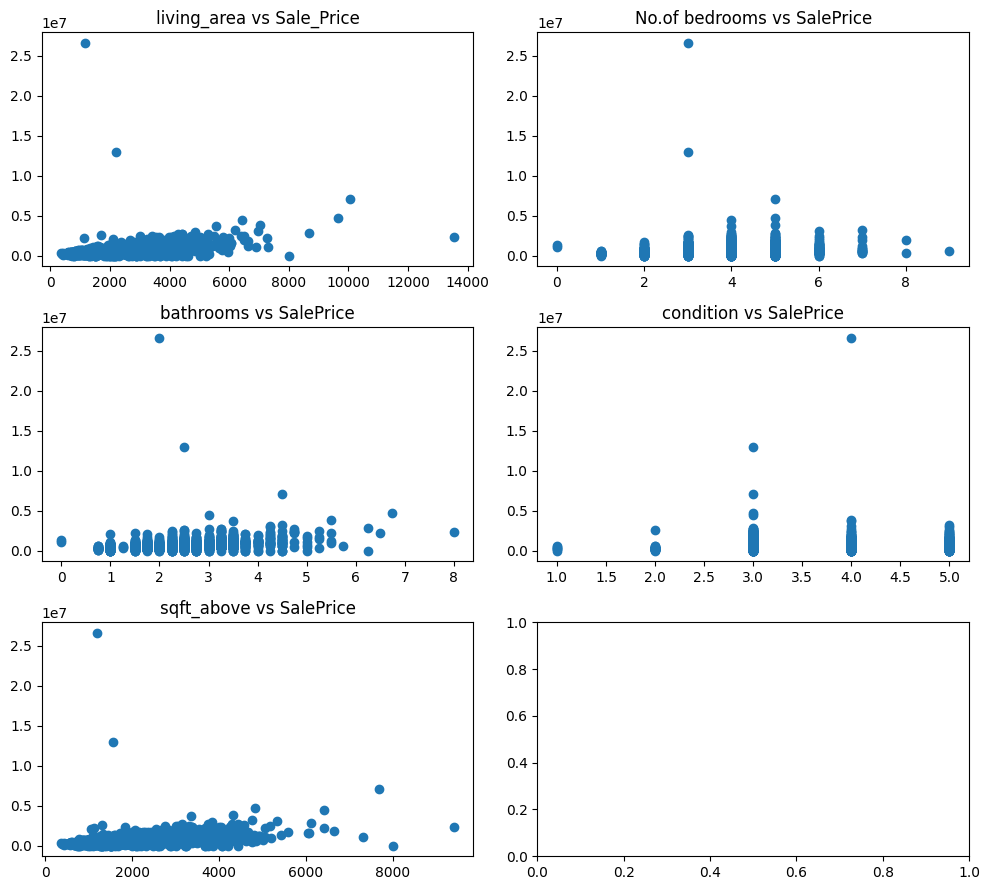

In [7]:

fig,ax = plt.subplots(3,2,figsize=(10,9))
sale_price = df['price'].values


ax[0,0].scatter(df['sqft_living'],sale_price)
ax[0,0].set_title('living_area vs Sale_Price')
ax[0,1].scatter(df['bedrooms'],sale_price)
ax[0,1].set_title('No.of bedrooms vs SalePrice')
ax[1,0].scatter(df['bathrooms'],sale_price)
ax[1,0].set_title('bathrooms vs SalePrice')
ax[1,1].scatter(df['condition'],sale_price)
ax[1,1].set_title('condition vs SalePrice')
ax[2,0].scatter(df['sqft_above'],sale_price)
ax[2,0].set_title('sqft_above vs SalePrice')
plt.tight_layout()

In [8]:
from sklearn.preprocessing import StandardScaler
X= df[['sqft_living','bedrooms','bathrooms','condition','sqft_above']]
y = df['price']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import array
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
regr = RandomForestRegressor(max_depth=200, random_state=42)
regr.fit(X, y)
y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(mse)
print(r2)


93666058850.06985
0.8703497796904922
